# **ЗАДАНИЕ 2. ПРЕОБРАЗОВАНИЕ И АНАЛИЗ ДИНАМИКИ ВРЕМЕННОГО РЯДА**

Измените частоту представления данных по ценам на материал 1 в большую и в меньшую сторону, воспользуйтесь основными аналитическими характеристиками динамики для анализа и прогнозирования временного ряда.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


**Методика выполнения задания:**

# **Раздел 1. Изменение частоты представления данных и интерполяция**

**1.	Прочитайте данные по ценам на материал 1 и приведите их к виду, пригодному для дальнейшего анализа (см. пп.1-10 Задания 1).**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade xlrd

In [ ]:
import os
import pandas as pd
from pandas import concat
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

In [ ]:
my_data = data.iloc[0:2,2:].T.rename(columns={0: 'Date', 1: 'Value'}).set_index('Date')
my_data.dtypes
#iloc[0:2,2:]                             - нарезал нужные строки и столбцы
#.T                                       - поверхул всё, т.е. транспонировал
#.rename(columns={0: 'Date', 1: 'Value'}) - поменял названия столбцов
# .set_index('Date')                      - сделал столбец с датами индексом

Value    object
dtype: object

In [ ]:
my_data.shape[0]

48

In [ ]:
my_data.info()

In [ ]:
my_data['Value'] = my_data['Value'].astype(float)

In [ ]:
my_data.info()

In [ ]:
my_data.sample(4)

,Value
Date,
2007-04-01,30.03
2007-06-01,25.58
2008-11-01,31.57
2007-05-01,28.96


In [ ]:
my_data.shape

(48, 1)

**2.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze().**

In [ ]:
series=my_data.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2007-01-01    26.45
2007-02-01    23.89
2007-03-01    25.95
2007-04-01    30.03
2007-05-01    28.96
Name: Value, dtype: float64

**3.	Перейдите к дневной разбивке данных, воспользовавшись функцией resample('D').mean(). Результат запишите в переменную upsampled. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
upsampled=series.resample('D').mean() # переход от помесечной разбивки к разбивке по дням

In [ ]:
upsampled.head(32)

In [ ]:
upsampled.shape

(1431,)

**4.	Проведите интерполяцию данных на основе полинома 1-ой степени, воспользовавшись функцией interpolate(method='linear'). Результат запишите в переменную interpolated. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Каким будет значение цены 7 января 2007 года?**

**Интерполя́ция** (от лат. inter–polis — «разглаженный, подновлённый, обновлённый; преобразованный») — в вычислительной математике нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.

**полином_1(первого)_порядка**

In [ ]:
interpolated=upsampled.interpolate(method='linear') # в качестве метода интерполяции используем линейную регрессию

In [ ]:
interpolated.head(32)

Date
2007-01-01    26.450000
2007-01-02    26.367419
2007-01-03    26.284839
2007-01-04    26.202258
2007-01-05    26.119677
2007-01-06    26.037097
2007-01-07    25.954516
2007-01-08    25.871935
2007-01-09    25.789355
2007-01-10    25.706774
2007-01-11    25.624194
2007-01-12    25.541613
2007-01-13    25.459032
2007-01-14    25.376452
2007-01-15    25.293871
2007-01-16    25.211290
2007-01-17    25.128710
2007-01-18    25.046129
2007-01-19    24.963548
2007-01-20    24.880968
2007-01-21    24.798387
2007-01-22    24.715806
2007-01-23    24.633226
2007-01-24    24.550645
2007-01-25    24.468065
2007-01-26    24.385484
2007-01-27    24.302903
2007-01-28    24.220323
2007-01-29    24.137742
2007-01-30    24.055161
2007-01-31    23.972581
2007-02-01    23.890000
Freq: D, Name: Value, dtype: float64

**5.	Постройте для интерполированного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

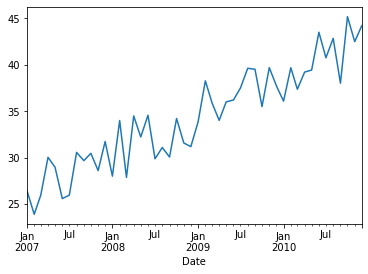

In [ ]:
interpolated.plot()
plt.show()

**6.	Проведите интерполяцию данных на основе полинома 2-ой степени, воспользовавшись функцией interpolate(method='spline', order=2). Результат запишите в переменную interpolated. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Каким будет значение цены 7 января 2007 года?**

**полином_2(второго)_порядка**

In [ ]:
interpolated=upsampled.interpolate(method='spline', order=2)

In [ ]:
interpolated.head(32)

Date
2007-01-01    26.450000
2007-01-02    26.309284
2007-01-03    26.131431
2007-01-04    25.959820
2007-01-05    25.794453
2007-01-06    25.635327
2007-01-07    25.482445
2007-01-08    25.335805
2007-01-09    25.195408
2007-01-10    25.061254
2007-01-11    24.933342
2007-01-12    24.811673
2007-01-13    24.696247
2007-01-14    24.587063
2007-01-15    24.484122
2007-01-16    24.387424
2007-01-17    24.296968
2007-01-18    24.212755
2007-01-19    24.134785
2007-01-20    24.063057
2007-01-21    23.997573
2007-01-22    23.938330
2007-01-23    23.885331
2007-01-24    23.838574
2007-01-25    23.798060
2007-01-26    23.763788
2007-01-27    23.735759
2007-01-28    23.713973
2007-01-29    23.698430
2007-01-30    23.689129
2007-01-31    23.686071
2007-02-01    23.890000
Freq: D, Name: Value, dtype: float64

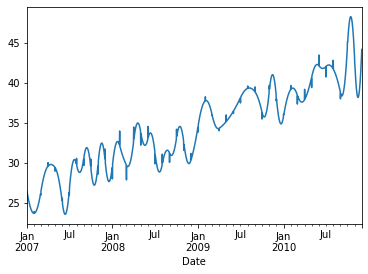

In [ ]:
interpolated.plot()
plt.show()

**8.	Перейдите к квартальной разбивке данных для 2007 года, воспользовавшись функцией resample('Q'). Результат запишите в переменную resample. Для каждого квартала найдите среднеквартальное значение цены на материал 1, воспользовавшись функцией mean(). Результат запишите в переменную q_mean. Выведите на экран первые 5 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
q_mean=series.resample('Q').mean() # переходим к таблице по кварталам

In [ ]:
q_mean.head()

Date
2007-03-31    25.430000
2007-06-30    28.190000
2007-09-30    28.730000
2007-12-31    30.263333
2008-03-31    29.953333
Freq: Q-DEC, Name: Value, dtype: float64

**9.	Постройте для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Что вы можете сказать о наблюдаемой тенденции?**

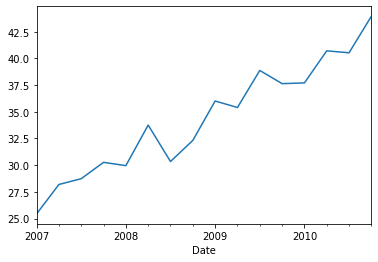

In [ ]:
q_mean.plot()
plt.show()

**10. Перейдите к годовой разбивке данных, воспользовавшись функцией resample('A'). Результат запишите в переменную resample. Для каждого года найдите среднегодовое значение цены на материал 1, воспользовавшись функцией mean(). Результат запишите в переменную y_mean. Выведите на экран первые 5 наблюдений, воспользовавшись функцией head().**

In [ ]:
y_mean=series.resample('A').mean()

In [ ]:
y_mean

Date
2007-12-31    28.153333
2008-12-31    31.592500
2009-12-31    36.983333
2010-12-31    40.727500
Freq: A-DEC, Name: Value, dtype: float64

**11. Постройте для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.**

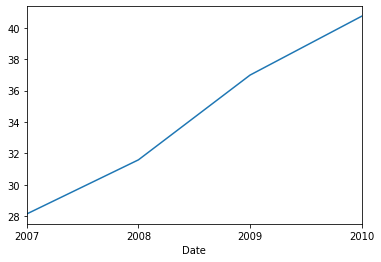

In [ ]:
y_mean.plot()
plt.show()


# **Раздел 2. Анализ динамики и прогнозирование временного ряда**

**12.	 Постройте таблицу данных на основе значений среднегодовой цены на материал 1 (y_mean.values), воспользовавшись функцией DataFrame() из модуля pandas, результат запишите в переменную values.**

In [ ]:
y_mean=series.resample('A').mean() # выводим значения по годам
y_mean

Date
2007-12-31    28.153333
2008-12-31    31.592500
2009-12-31    36.983333
2010-12-31    40.727500
Freq: A-DEC, Name: Value, dtype: float64

In [ ]:
values=pd.DataFrame(y_mean.values)
values

,0
0,28.153333
1,31.592500
2,36.983333
3,40.727500


**13.	Поместите в переменную df исходный ряд и сдвинутый на 1 шаг, воспользовавшись функцией concat([values.shift(1), values], axis=1) из модуля pandas. Дайте полученным столбцам названия 't' и 't+1', воспользовавшись следующей командой: df.columns = ['t', 't+1']. Выведите на экран первые 5 значений, воспользовавшись функцией head().**

In [ ]:
df=concat([values.shift(1), values], axis=1) # создаем столбец со смещением на единицу

In [ ]:
df.columns = ['t-1', 't']

**14.	 Рассчитайте на основе полученной таблицы среднегодовых значений цены на материал 1основные показатели динамики за 4 года. Необходимые при этом формулы приведены в таблице ниже.**

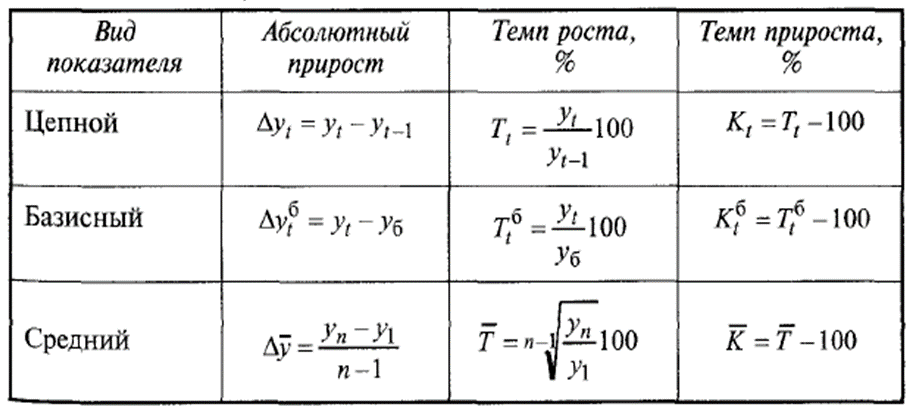

**Абсолютный прирост** - от последующего значения отнимаем предыдущее и получаем прирост, если получаем отрицательное значение, то убыль.

**Темп роста** - если Темп роста = 100%, то рост неизменим.
                 Средний темп роста показывает сколько в среднем процентов последующий уровень составляет от предыдущего.

**Темп прироста** - показывает на сколько изменился последующий уровень по-сравнению с базой или предыдущим уровнем

**Цепной** - каждый последующий уровень сравнивается с предыдущим

**Базисный** - все расчеты происходят от одной базы (одного значения)

**Средий** -
из последнего значения вычесть первое и разделить на n-1, где n - количество элементов ряда

**14.1.	Поместите в таблицу данных df столбцы с вычисленными значениями следующих показателей:**

1)	абсолютный цепной прирост (Delta_t),

2)	абсолютный базисный прирост (Delta_0),

3)	цепной темп роста (Temp_t),

4)	базисный темп роста (Temp_0),

5)	цепной темп прироста (TDelta_t),

6)	базисный темп прироста (TDelta_0).

В качестве базисного периода возьмите 2007 год. Выведите на экран полученный результат.


In [ ]:
df.head()

,t-1,t
0,NaN,28.153333
1,28.153333,31.592500
2,31.592500,36.983333
3,36.983333,40.727500


In [ ]:
df['t'][0] # это база для абсолютного базисного прироста

28.153333333333336

In [ ]:
df['Delta_t']=df['t']-df['t-1'] # абсолютный цепной прирост (Delta_t)

In [ ]:
df['Delta_0']=df['t']-df['t'][0] # абсолютный базисный прирост (Delta_0),

In [ ]:
df['Temp_t']=df['t']/df['t-1'] # цепной темп роста (Temp_t)

In [ ]:
df['Temp_0']=df['t']/df['t'][0] # базисный темп роста (Temp_0)

In [ ]:
df['TDelta_t'] = df['Temp_t'] - 1 # цепной темп прироста (TDelta_t)

In [ ]:
df['TDelta_0'] = df['Temp_0'] - 1 # базисный темп прироста (TDelta_0)
df.head()

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,28.153333,NaN,0.000000,NaN,1.000000,NaN,0.000000
1,28.153333,31.592500,3.439167,3.439167,1.122158,1.122158,0.122158,0.122158
2,31.592500,36.983333,5.390833,8.830000,1.170636,1.313640,0.170636,0.313640
3,36.983333,40.727500,3.744167,12.574167,1.101239,1.446632,0.101239,0.446632


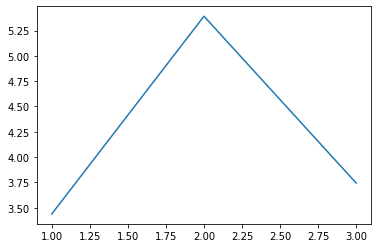

In [ ]:
df['Delta_t'].plot()
plt.show()

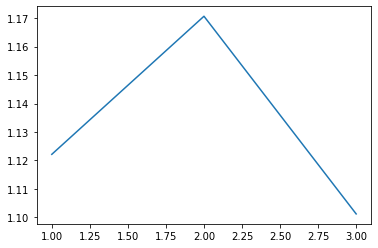

In [ ]:
df['Temp_t'].plot()
plt.show()

**14.2.	Рассчитайте за 4 года средний абсолютный прирост (AvgDelta), средний темп роста (AvgTemp), средний темп прироста (AvgTDelta). Для нахождения первого и последнего значения временного ряда воспользуйтесь методом iloc[]. Прокомментируйте результат.**

In [ ]:
df

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,28.153333,NaN,0.000000,NaN,1.000000,NaN,0.000000
1,28.153333,31.592500,3.439167,3.439167,1.122158,1.122158,0.122158,0.122158
2,31.592500,36.983333,5.390833,8.830000,1.170636,1.313640,0.170636,0.313640
3,36.983333,40.727500,3.744167,12.574167,1.101239,1.446632,0.101239,0.446632


In [ ]:
i_1 = df.iloc[0,1]
i_n = df.iloc[-1,1]
i_1,i_n

(28.153333333333336, 40.7275)

In [ ]:
AvgDelta = (i_n - i_1)/(len(df.t)-1) # средний абсолютный прирост
AvgDelta

4.191388888888888

In [ ]:
AvgTemp = ((i_n/i_1)**(1/(len(df.t)-1))) # средний темп роста
AvgTemp

1.1309740580674148

In [ ]:
AvgTDelta = AvgTemp - 1 # средний темп прироста
AvgTDelta

0.1309740580674148

**15.	 Спрогнозируйте среднюю цену на материал 1 для 2011 года на основе среднего абсолютного прироста или среднего темпа роста в зависимости от характера динамики абсолютного цепного прироста и цепного темпа роста. Необходимые для этого формулы приведены ниже.**

In [ ]:
predict=i_n+AvgDelta # прогноз на январь 2011 года
predict

44.91888888888889

In [ ]:
predict=i_n+2*AvgDelta
predict

49.110277777777775

# **ЗАДАНИЕ 3. СГЛАЖИВАНИЕ ВРЕМЕННОГО РЯДА**
На основе методов простой и взвешенной скользящих средних для цен на материал 1 выявите тренд и дайте прогноз на год вперед.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


Методика выполнения задания:

# **Раздел 1. Простая скользящая средняя с фиксированным окном**


**1.	Прочитайте данные по ценам на материал 1 и приведите их к виду, пригодному для дальнейшего анализа (см. пп.1-10 Задания 1).**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade xlrd

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

In [ ]:
my_data = data.iloc[0:2,2:].T.rename(columns={0: 'Date', 1: 'Value'}).set_index('Date')
my_data.dtypes
#iloc[0:2,2:]                             - нарезал нужные строки и столбцы
#.T                                       - поверхул всё, т.е. транспонировал
#.rename(columns={0: 'Date', 1: 'Value'}) - поменял названия столбцов
# .set_index('Date')                      - сделал столбец с датами индексом

Value    object
dtype: object

In [ ]:
my_data['Value'] = my_data['Value'].astype(float)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import DataFrame
from pandas import concat

In [ ]:
my_data.sample(4)

,Value
Date,
2008-12-01,31.18
2007-09-01,29.67
2008-05-01,32.22
2007-05-01,28.96


**3.	Преобразуйте набор данных о цене на материал 1 с помощью простой скользящей средней с размером окна 3 месяца. Воспользуйтесь набором функций rolling(window=3).mean(). Результат запишите в переменную rolling_mean.** **В данном случае преобразованное значение в момент времени (t) вычисляется, как среднее значение для предыдущих 3 наблюдений** (t-2, t-1, t): obs(t) =1/3*(obs(t - 2) + obs(t - 1) + obs(t)).

In [ ]:
series=my_data.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2007-01-01    26.45
2007-02-01    23.89
2007-03-01    25.95
2007-04-01    30.03
2007-05-01    28.96
Name: Value, dtype: float64

In [ ]:
# сглаживание нужно для поиска тренда

In [ ]:
rolling_mean=series.rolling(window=3).mean()
# расшфровка: из 3-х(окно) значений делает 1(берет среднее от 3-х) и записывает вместо 3-го,
# смещается на 1 строку вниз, опять берет 3 значения ...., так выравнивается ряд

In [ ]:
rolling_mean.head(10)

Date
2007-01-01          NaN
2007-02-01          NaN
2007-03-01    25.430000
2007-04-01    26.623333
2007-05-01    28.313333
2007-06-01    28.190000
2007-07-01    26.833333
2007-08-01    27.366667
2007-09-01    28.730000
2007-10-01    30.230000
Name: Value, dtype: float64

**4.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных данных (rolling_mean), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. График скользящей средней изобразите красным цветом, для этого в функции plot() задайте параметр color='red'. Прокомментируйте результат.**

NameError: ignored

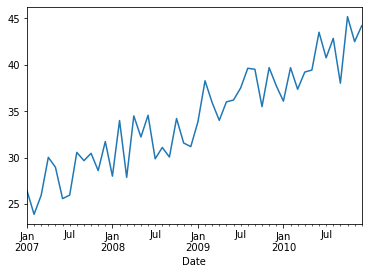

In [ ]:
series.plot()
rolling_mean.plot(color='red')
plt.show()

**5.	Проделайте то же самое для ширины окна 5 месяцев. Сравните результаты. Какую ширину окна Вы выберете?**

In [ ]:
rolling_mean=series.rolling(window=5).mean()

In [ ]:
rolling_mean.head(10)

Date
2007-01-01       NaN
2007-02-01       NaN
2007-03-01       NaN
2007-04-01       NaN
2007-05-01    27.056
2007-06-01    26.882
2007-07-01    27.296
2007-08-01    28.218
2007-09-01    28.146
2007-10-01    28.446
Name: Value, dtype: float64

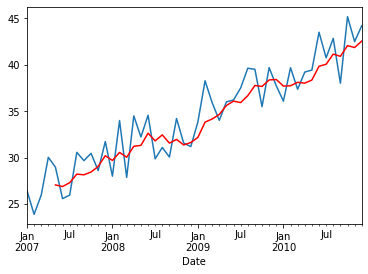

In [ ]:
series.plot()
rolling_mean.plot(color='red')
plt.show()

**6.	Воспользуйтесь моделью простой скользящей средней с выбранной Вами шириной окна для прогнозирования значений временного ряда в пошаговом режиме. При этом прогнозируемое и ожидаемое значение печатается на каждом временном шаге. Это потребует выполнения следующих действий:**

**6.1.	Запишите в переменную X значения временного ряда, обратившись к атрибуту values.**

In [ ]:
X=series.values

**6.2.	В переменной window задайте выбранную Вами ширину окна.**

In [ ]:
window =3

In [ ]:
X

array([26.45, 23.89, 25.95, 30.03, 28.96, 25.58, 25.96, 30.56, 29.67,
       30.46, 28.6 , 31.73, 28.  , 33.99, 27.87, 34.49, 32.22, 34.56,
       29.87, 31.09, 30.06, 34.21, 31.57, 31.18, 33.85, 38.27, 35.92,
       34.01, 36.  , 36.2 , 37.5 , 39.62, 39.51, 35.49, 39.69, 37.74,
       36.08, 39.68, 37.36, 39.21, 39.43, 43.5 , 40.75, 42.84, 38.01,
       45.18, 42.49, 44.2 ])

**6.3.	В переменную history поместите список значений временного ряда в пределах ширины окна, создав его методом спискового включения [X[i] for i in range(window)].**

In [ ]:
history =[X[i] for i in range(window)]
history

[26.45, 23.89, 25.95]

**6.4.	В переменную test поместите список значений временного ряда в интервале от окончания ширины окна до длины временного ряда, создав его методом спискового включения [X[i] for i in range(window, len(X))].**

In [ ]:
test =[X[i] for i in range(window, len(X))]

In [ ]:
test

**6.5.	Создайте пустой список с помощью функции list() и запишите его в переменную predictions.**

In [ ]:
predictions=list()

**6.6.	Перебирайте временные периоды t тестового набора range(len(test)) с помощью цикла for и для каждого наблюдения выполняйте следующие действия:**

**6.6.1.	С помощью функции len() определите длину исторических данных (history) и результат запишите в переменную length.**

**6.6.2.	Создайте список значений временного ряда для расчета скользящей средней с помощью метода спискового включения [history[i] for i in range(length-window,length)]. Найдите среднее значение списка с помощью функции mean(). Результат запишите в переменную yhat.**

**6.6.3.	Наблюдаемое на данном шаге значение test[t] запишите в переменную obs.**

**6.6.4.	В список predictions добавьте найденный прогноз с помощью функции append(yhat).**

**6.6.5.	В список history добавьте новое наблюдаемое значение с помощью функции append(obs).**

**6.6.6.	Выведите на экран прогнозное и наблюдаемое на каждом шаге значение временного ряда с помощью функции print('predicted=%f, expected=%f' % (yhat, obs)).**


In [ ]:
# делаем прогноз пошагово, т.е. по 3-ем делаем прогноз (см. в predicted), а фактическое значение см. в expected,
# затем смещаемся и опять ....
for t in range(len(test)):
  length=len(history)
  yhat=np.mean([history[i] for i in range(length-window,length)])
  obs=test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=25.430000, expected=30.030000
predicted=26.623333, expected=28.960000
predicted=28.313333, expected=25.580000
predicted=28.190000, expected=25.960000
predicted=26.833333, expected=30.560000
predicted=27.366667, expected=29.670000
predicted=28.730000, expected=30.460000
predicted=30.230000, expected=28.600000
predicted=29.576667, expected=31.730000
predicted=30.263333, expected=28.000000
predicted=29.443333, expected=33.990000
predicted=31.240000, expected=27.870000
predicted=29.953333, expected=34.490000
predicted=32.116667, expected=32.220000
predicted=31.526667, expected=34.560000
predicted=33.756667, expected=29.870000
predicted=32.216667, expected=31.090000
predicted=31.840000, expected=30.060000
predicted=30.340000, expected=34.210000
predicted=31.786667, expected=31.570000
predicted=31.946667, expected=31.180000
predicted=32.320000, expected=33.850000
predicted=32.200000, expected=38.270000
predicted=34.433333, expected=35.920000
predicted=36.013333, expected=34.010000


**7.	Рассчитайте и выведите на экран корень квадратный из среднеквадратичной ошибки (RMSE) для всех сделанных прогнозов, воспользовавшись функцией sqrt() из модуля math для извлечения корня квадратного и функцией mean_squared_error(test, predictions) из модуля sklearn.metrics для нахождения средней квадратичной ошибки. Прокомментируйте результат.**

In [ ]:
RMSE=sqrt(mean_squared_error(test, predictions)) # неплохо, по-сравнению со значениями 40, 37,38 - 2.7 -маленькое значение
# и увидел бог, что это хорошо
RMSE

2.7011623469705337

**8.	Поместите на одну диаграмму линейный график исходных данных (test) и спрогнозированных данных (predictions), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Прогнозный график изобразите красным цветом, задав в функции plot() параметр color='red'. Прокомментируйте результат.**

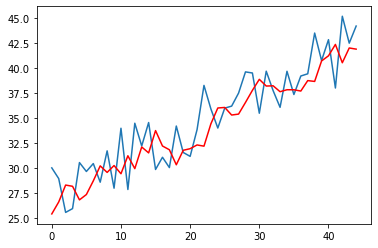

In [ ]:
plt.plot(test) # фактические значения
plt.plot(predictions, color='red') # прогнозные значения, которые определялись на
                                   # каждом шаге сучетом поступающей информации
plt.show()

# **Раздел 2. Простая скользящая средняя с расширяющимся окном**

**9.	Найдите простую среднюю для расширяющегося окна, воспользовавшись сочетанием функций expanding().mean(). Результат запишите в переменную exp_mean. Выведите на экран первые 10 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**


In [ ]:
exp_mean=series.expanding().mean()

In [ ]:
exp_mean.head(10)

Date
2007-01-01    26.450000
2007-02-01    25.170000
2007-03-01    25.430000
2007-04-01    26.580000
2007-05-01    27.056000
2007-06-01    26.810000
2007-07-01    26.688571
2007-08-01    27.172500
2007-09-01    27.450000
2007-10-01    27.751000
Name: Value, dtype: float64

**10.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных данных (expanding_mean), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. График преобразованных данных изобразите красным цветом, задав в функции plot() параметр color='red'. Прокомментируйте результат.**

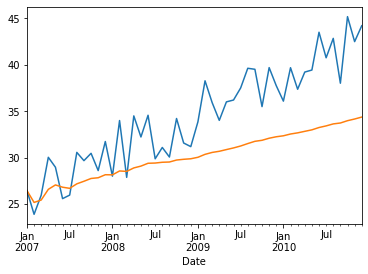

In [ ]:
series.plot()
exp_mean.plot()
plt.show()

# **Раздел 3. Взвешенная скользящая средняя с фиксированным окном**

**11.	 Задайте веса в линейно возрастающем порядке. Пусть ширина окна равна 5. Сначала сгенерируйте 5 целых чисел от 1 до 6 не включительно с помощью функции arange() из модуля numpy. Результат запишите в переменную fig. Нормируйте полученные числа путем их деления на сумму списка, найденную с помощью функции sum(). Запишите полученный результат в переменную weights и выведите ее содержимое на экран.**


# **!!!!!!!!!!! создаем_свои_веса**

In [ ]:
fig=np.arange(1,6)
fig

array([1, 2, 3, 4, 5])

In [ ]:
# пояснеие: эти веса не самрегулируются, а задаются мной

In [ ]:
weights = fig/fig.sum() # здесь получаем чтобы веса в сумме давали единицу
weights

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

In [ ]:
# пояснение: количество весов weights и ширина окна rolling(5) д.б. равны, т.к. первый вес умножается на первое
# значение окна потом прибавляется второй вес умноженный на второе значение окна и т.д., итоговая сумма будет
# нашим значением

**12.	 Далее вычислите взвешенную скользящую среднюю, воспользовавшись функцией rolling(5), чтобы задать скользящее окно, и написанной вами lambda функцией для вычисления средней взвешенной, применить которую к данным можно с помощью функции  apply(lambda series: np.dot(series,weights, raw=True). Последние наблюдения имеют большие веса, чем первые, в соответствии с заданным правилом. Результат запишите в переменную wma51. Выведите на экран первые 10 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
# здесь получаем ряд выравнивания с использованием весов(заданных)
wma51=series.rolling(5).apply(lambda x: np.dot(x,weights), raw=True)
wma51.head(10)

Date
2007-01-01          NaN
2007-02-01          NaN
2007-03-01          NaN
2007-04-01          NaN
2007-05-01    26.341714
2007-06-01    29.172000
2007-07-01    28.683143
2007-08-01    26.060857
2007-09-01    26.831714
2007-10-01    29.113143
Name: Value, dtype: float64

**13.	 Найдите простую скользящую среднюю для такой же ширины окна, воспользовавшись сочетанием функций rolling(5).mean(). Результат запишите в переменную sma5.**

In [ ]:
sma5=series.rolling(5).mean() # простая скользящая средняя без весов
sma5

Date
2007-01-01       NaN
2007-02-01       NaN
2007-03-01       NaN
2007-04-01       NaN
2007-05-01    27.056
2007-06-01    26.882
2007-07-01    27.296
2007-08-01    28.218
2007-09-01    28.146
2007-10-01    28.446
2007-11-01    29.050
2007-12-01    30.204
2008-01-01    29.692
2008-02-01    30.556
2008-03-01    30.038
2008-04-01    31.216
2008-05-01    31.314
2008-06-01    32.626
2008-07-01    31.802
2008-08-01    32.446
2008-09-01    31.560
2008-10-01    31.958
2008-11-01    31.360
2008-12-01    31.622
2009-01-01    32.174
2009-02-01    33.816
2009-03-01    34.158
2009-04-01    34.646
2009-05-01    35.610
2009-06-01    36.080
2009-07-01    35.926
2009-08-01    36.666
2009-09-01    37.766
2009-10-01    37.664
2009-11-01    38.362
2009-12-01    38.410
2010-01-01    37.702
2010-02-01    37.736
2010-03-01    38.110
2010-04-01    38.014
2010-05-01    38.352
2010-06-01    39.836
2010-07-01    40.050
2010-08-01    41.146
2010-09-01    40.906
2010-10-01    42.056
2010-11-01    41.854
2010-12-

**14.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных на основе простой (sma5) и взвешенной скользящей средней (wma51) для ширины окна 5, воспользовавшись функцией figure(figsize = (12,6)), plot(data, label=label), а также функцией show() из модуля matplotlib.pyplot. Подпишите оси с помощью функций xlabel("Date") и ylabel("Price") из модуля matplotlib.pyplot. Создайте легенду с помощью функции legend() из модуля matplotlib.pyplot. Прокомментируйте результат.**

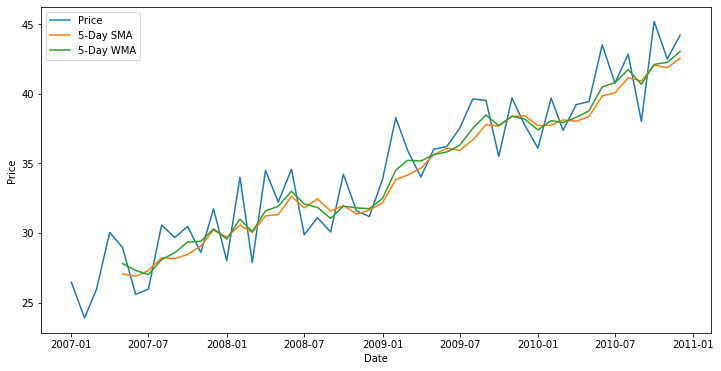

In [ ]:
plt.figure(figsize = (12,6))

plt.plot(series, label='Price')
plt.plot(sma5, label='5-Day SMA')
plt.plot(wma51, label='5-Day WMA')

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

**15.	 Измените веса в формуле взвешенной скользящей средней. Воспользуйтесь весами для сглаживания по полиномам 2-го или 3-го порядка для ширины окна, равной 5: [-3/35,12/35,17/35,12/35,-3/35] . Создайте список весов с помощью функции array из модуля numpy. Результат запишите в переменную weights.**

Если мы берем **полиномы 2-го или 3-го** порядка, то существует **таблица** для задания ширины окна.

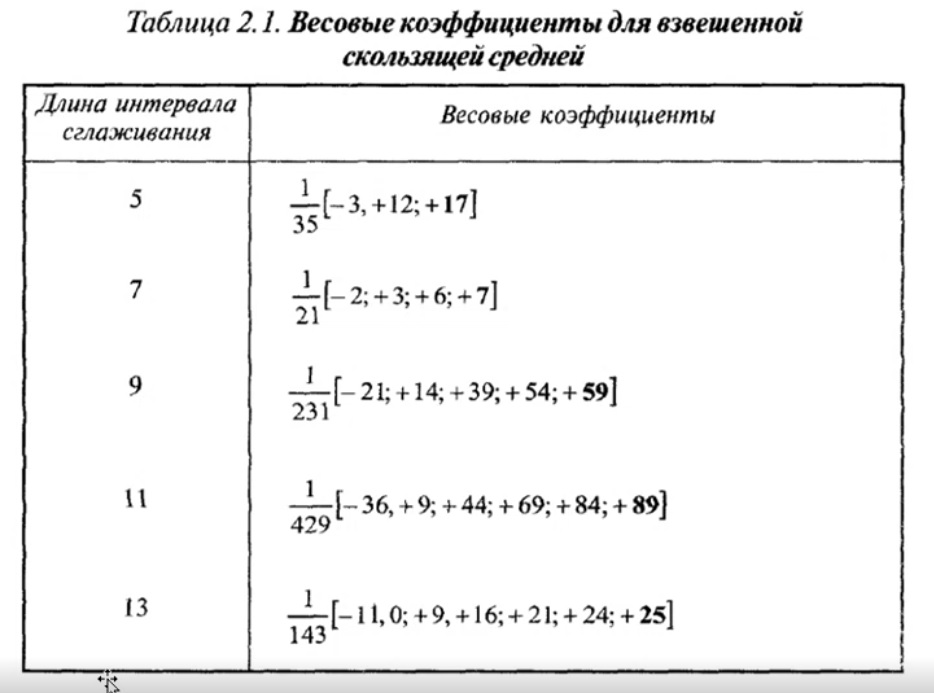

In [ ]:
weights=np.array([-3/35,12/35,17/35,12/35,-3/35])
weights

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

**16.	Воспользуйтесь приемом, описанным в п. 12, для нахождения взвешенной скользящей средней. Результат запишите в переменную wma52. Выведите на экран первые 10 значений с помощью функции head(). Сравните их с предыдущим результатом. Прокомментируйте результат.**

In [ ]:
wma52=series.rolling(5).apply(lambda x: np.dot(x,weights), raw=True)
wma52.head(10)

Date
2007-01-01          NaN
2007-02-01          NaN
2007-03-01          NaN
2007-04-01          NaN
2007-05-01    26.341714
2007-06-01    29.172000
2007-07-01    28.683143
2007-08-01    26.060857
2007-09-01    26.831714
2007-10-01    29.113143
Name: Value, dtype: float64

**17.	 Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных на основе простой (sma5) и двух версий взвешенной скользящей средней для ширины окна 5 (wma51, wma52), воспользовавшись функцией figure(figsize = (12,6)), plot(data, label=label), а также функцией show() из модуля matplotlib.pyplot. Подпишите оси с помощью функций xlabel("Date") и ylabel("Price") из модуля matplotlib.pyplot. Создайте легенду с помощью функции legend() из модуля matplotlib.pyplot. Прокомментируйте результат.**

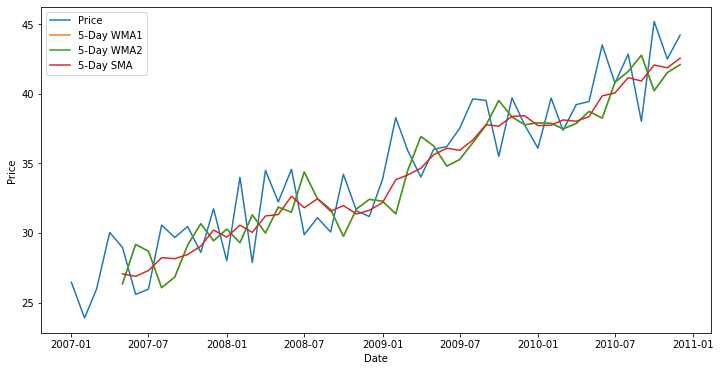

In [ ]:
plt.figure(figsize = (12,6))

plt.plot(series, label='Price')
plt.plot(wma51, label='5-Day WMA1')
plt.plot(wma52, label='5-Day WMA2') # зеленая более подходящая она с каким-то сдвигом более всего угадывает
plt.plot(sma5, label='5-Day SMA')   # зеленая более других угадывает амплтьуду, поэтому лучше она

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

predicted=26.341714, expected=25.580000
predicted=26.416286, expected=25.960000
predicted=27.126000, expected=30.560000
predicted=29.365143, expected=29.670000
predicted=29.241714, expected=30.460000
predicted=29.113143, expected=28.600000
predicted=28.854286, expected=31.730000
predicted=30.832571, expected=28.000000
predicted=29.589143, expected=33.990000
predicted=31.070286, expected=27.870000
predicted=31.292286, expected=34.490000
predicted=30.787429, expected=32.220000
predicted=30.955429, expected=34.560000
predicted=34.141714, expected=29.870000
predicted=32.729143, expected=31.090000
predicted=32.453143, expected=30.060000
predicted=32.832857, expected=34.210000
predicted=33.515143, expected=31.570000
predicted=32.062857, expected=31.180000
predicted=32.512000, expected=33.850000
predicted=32.275429, expected=38.270000
predicted=31.571714, expected=35.920000
predicted=32.158000, expected=34.010000
predicted=33.343143, expected=36.000000
predicted=34.995714, expected=36.200000


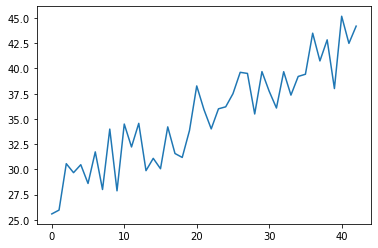

In [ ]:
X = series.values
weights=[-3/35,12/35,17/35,12/35,-3/35]*10
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.sum([history[i]*weights[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
#plt.plot(predictions, color='red')
plt.show()